# Analyze MLD depth of time series data
(from BCO CTDdat file)

This .ncdf file is a collection of monthly CTD runs at CARIACO Ocean Time Series Station.

In [10]:
require(dplyr, warn.conflicts = FALSE)
require(cowplot, warn.conflicts = FALSE)

In [2]:
# read CTDdat file
ctd <- read.csv("DATA_processed/CTDdat_processed.csv")

# read Date column as POSIXct
ctd$Date <- as.Date(ctd$Date, format="%Y-%m-%d")

In [3]:
names(ctd)

[1] "X"          "CruiseID"   "Date"       "month"      "days"      
 [6] "press"      "depth"      "lat"        "lon"        "sigma_t"   
[11] "sigma_0"    "potemp"     "sal"        "temp"       "beam_att"  
[16] "beam_cp"    "fluor_chla"

## calculate MLD depth, defined as a change in sigma t of 0.125

In [60]:
mld_depth <- ctd %>%
  group_by(CruiseID) %>% # this groups it by the run number 
  filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_t >= sigma_t[10]+0.125 | sigma_t <= sigma_t[1]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

# let's try another way... interpolation!

In [36]:
mld_depth <- ctd %>%
  group_by(Date) %>% # this groups it by the run number 
  filter(press > 8) %>% # only take values below 8 meters depth to minimze influence of surface anomalies
  mutate(belowmld = sigma_0 >= sigma_0[1]+0.125 | sigma_0 <= sigma_0[1]-0.125) %>% # create new column that gives "True" for values below MLD
  filter(belowmld == T) %>% # only take "True" values 
  slice(1) %>% # takes the first occurrence
  ungroup() #removes grouping

In [53]:
library(castr, warn.conflicts = FALSE)

In [100]:
head(ctd)

X,CruiseID,Date,month,days,press,depth,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla
1,93HG_001,1995-11-08,11,311,2.011,2,10.5,-64.67,23.764,23.764,27.522,36.612,27.522,NA,NA,NA
2,93HG_001,1995-11-08,11,311,4.023,4,10.5,-64.67,23.775,23.775,27.488,36.612,27.489,NA,NA,NA
3,93HG_001,1995-11-08,11,311,6.034,6,10.5,-64.67,23.782,23.782,27.464,36.614,27.465,NA,NA,NA
4,93HG_001,1995-11-08,11,311,8.046,8,10.5,-64.67,23.786,23.787,27.456,36.613,27.458,NA,NA,NA
5,93HG_001,1995-11-08,11,311,10.057,10,10.5,-64.67,23.787,23.787,27.452,36.613,27.454,NA,NA,NA
6,93HG_001,1995-11-08,11,311,12.069,12,10.5,-64.67,23.787,23.788,27.449,36.612,27.452,NA,NA,NA


In [58]:
stats <- ctd %>% group_by(Date) %>%
  summarise(
    MLD = mld(sigma_t, depth, ref.depths=5:10, criteria=0.125)
  )


Warning message:
“Removed 139 rows containing missing values (geom_path).”

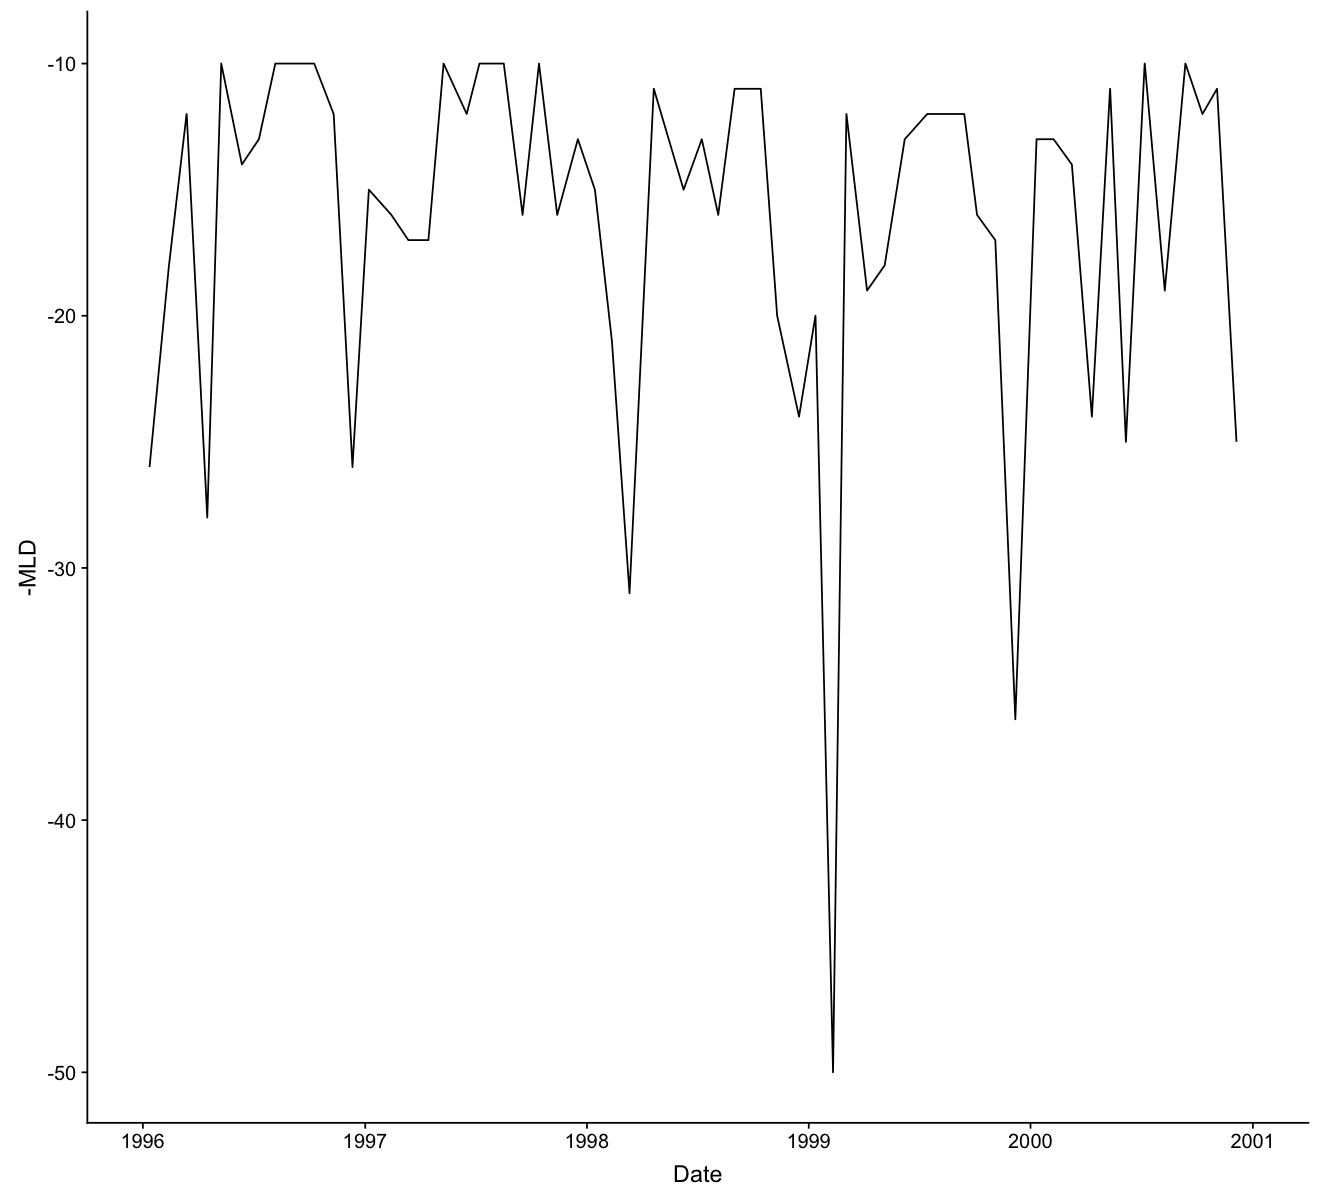

In [59]:
ggplot(stats) + geom_path(aes(x=Date, y=-MLD)) + scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1996/1/1"), as.Date("2001/1/1")))

Warning message:
“Removed 140 rows containing missing values (geom_point).”Warning message:
“Removed 139 rows containing missing values (geom_path).”

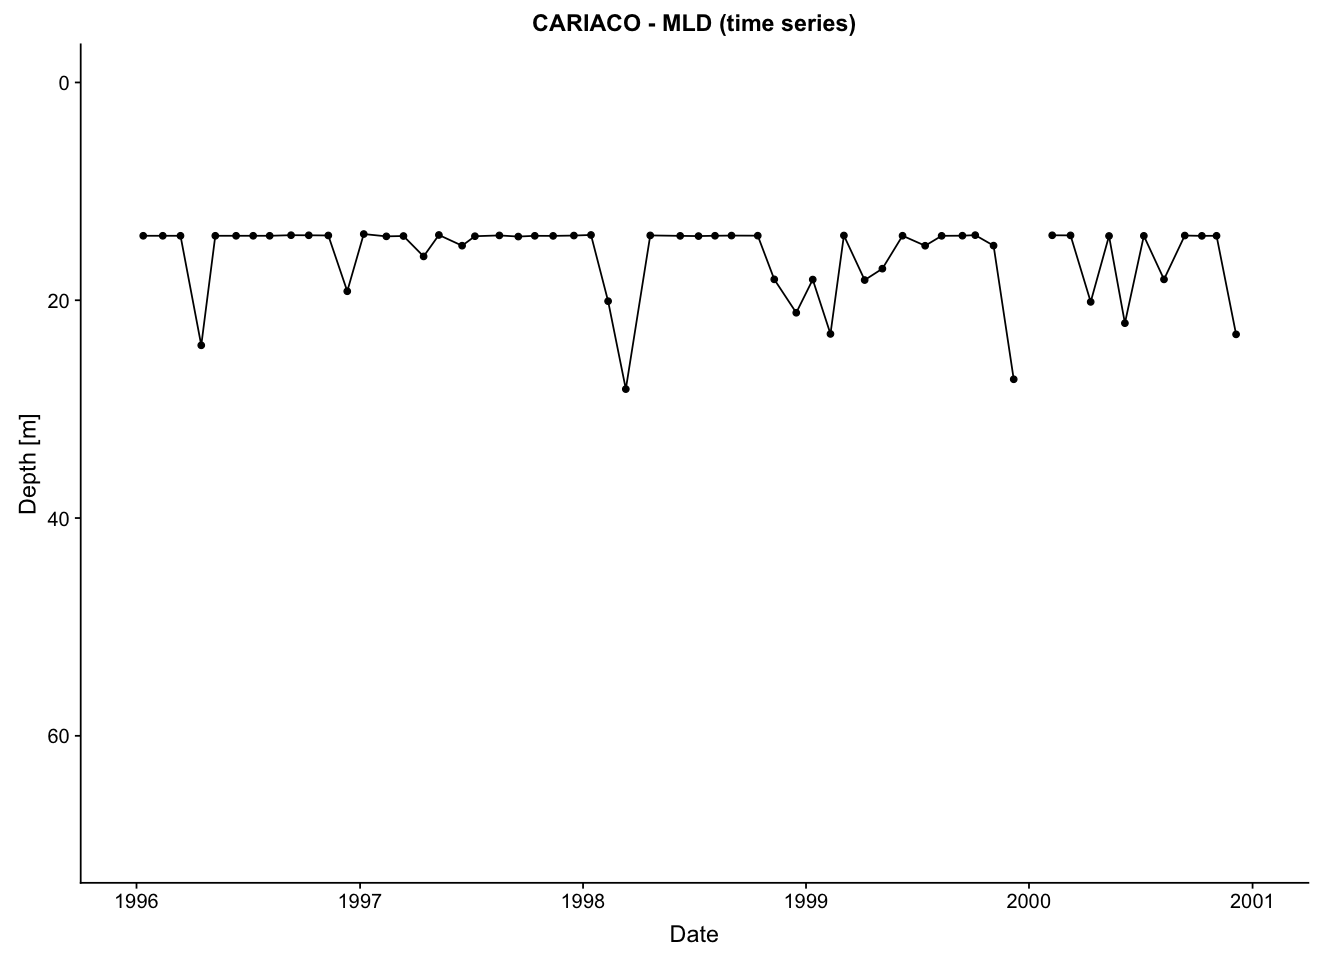

In [57]:
ggplot(stats,aes(x=Date,y=MLD))+
  geom_point()+ geom_line() + scale_y_reverse(lim=c(70,0)) +
  ylab("Depth [m]")+ xlab("Date")+ggtitle("CARIACO - MLD (time series)")+
    scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1996/1/1"), as.Date("2001/1/1")))

## plot MLD depth over time

In [105]:
29	61	35	32	39

ERROR: Error in parse(text = x, srcfile = src): <text>:1:9: unexpected numeric constant
1: 29      61
            ^


In [34]:
82.798/133.877*100

[1] 61.84632

In [39]:
35.11/133.877*100

[1] 26.22557

In [41]:
44.47/133.877*100

[1] 33.21706

In [42]:
40.7/133.877*100

[1] 30.40104

Warning message:
“Removed 1215 rows containing missing values (geom_point).”Warning message:
“Removed 1211 rows containing missing values (geom_point).”Warning message:
“Removed 1212 rows containing missing values (geom_point).”Warning message:
“Removed 1210 rows containing missing values (geom_point).”Warning message:
“Removed 1213 rows containing missing values (geom_point).”Warning message:
“Removed 1211 rows containing missing values (geom_point).”Warning message:
“Removed 1211 rows containing missing values (geom_point).”Warning message:
“Removed 1211 rows containing missing values (geom_point).”Warning message:
“Removed 1211 rows containing missing values (geom_point).”

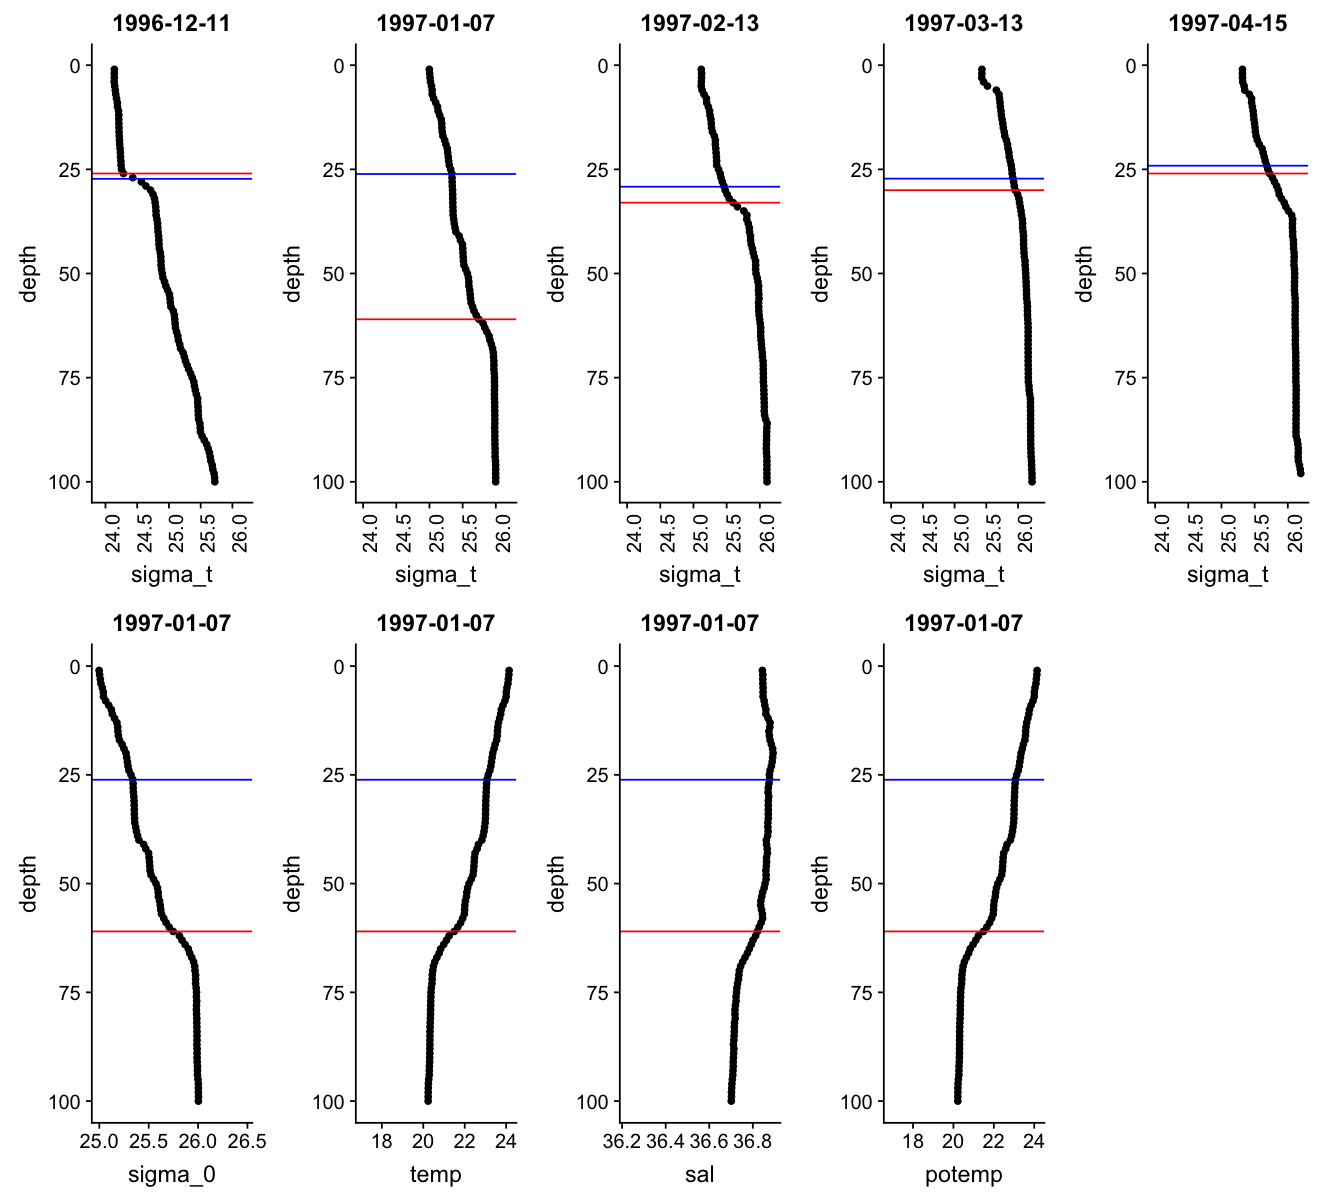

In [81]:
options(repr.plot.width=11, repr.plot.height=10)

dec <- ggplot(ctd[ctd$Date == unique(ctd$Date)[14],])+ geom_point(aes(x=sigma_t, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[14]))+ xlim(23.9,26.2) + geom_hline(yintercept = 26, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[14]],col='blue')+
theme(axis.text.x = element_text(angle = 90)) 

jan <- ggplot(ctd[ctd$Date == unique(ctd$Date)[15],])+ geom_point(aes(x=sigma_t, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[15]))+ xlim(24,26.2) + geom_hline(yintercept = 61, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[15]],col='blue')+
theme(axis.text.x = element_text(angle = 90)) 

feb <- ggplot(ctd[ctd$Date == unique(ctd$Date)[16],])+ geom_point(aes(x=sigma_t, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[16]))+ xlim(24,26.2) + geom_hline(yintercept = 33, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[16]],col='blue')+
theme(axis.text.x = element_text(angle = 90)) 

march <- ggplot(ctd[ctd$Date == unique(ctd$Date)[17],])+ geom_point(aes(x=sigma_t, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[17]))+ xlim(24,26.3) + geom_hline(yintercept = 30, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[17]],col='blue')+
theme(axis.text.x = element_text(angle = 90)) 

apr <- ggplot(ctd[ctd$Date == unique(ctd$Date)[18],])+ geom_point(aes(x=sigma_t, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[18])) + xlim(24,26.2) + geom_hline(yintercept = 26, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[18]],col='blue')+
theme(axis.text.x = element_text(angle = 90)) 


jan1 <- ggplot(ctd[ctd$Date == unique(ctd$Date)[15],])+ geom_point(aes(x=sigma_0, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[15])) + geom_hline(yintercept = 61, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[15]],col='blue')

jan2 <- ggplot(ctd[ctd$Date == unique(ctd$Date)[15],])+ geom_point(aes(x=temp, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[15])) + geom_hline(yintercept = 61, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[15]],col='blue')

jan3 <- ggplot(ctd[ctd$Date == unique(ctd$Date)[15],])+ geom_point(aes(x=sal, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[15])) + geom_hline(yintercept = 61, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[15]],col='blue')

jan4 <- ggplot(ctd[ctd$Date == unique(ctd$Date)[15],])+ geom_point(aes(x=potemp, y=depth)) + 
scale_y_reverse(limits=c(100,0)) + ggtitle(paste(unique(ctd$Date)[15])) + geom_hline(yintercept = 61, col = 'red')+
geom_hline(yintercept = mld_depth$press[mld_depth$Date == unique(ctd$Date)[15]],col='blue')


plot_grid(dec,jan,feb,march,apr,jan1,jan2,jan3,jan4, nrow=2)

In [83]:
ggsave('PLOTS/MLD_wtf.png', width=11, height= 10)

In [13]:
ctd[ctd$Date == unique(ctd$Date)[14],]

,X,CruiseID,Date,month,days,press,depth,lat,lon,sigma_t,sigma_0,potemp,sal,temp,beam_att,beam_cp,fluor_chla
13012,13012,93HG_014,1996-12-11,12,345,1.050,1,10.5,-64.67,24.140,24.140,26.435,36.645,26.435,NA,NA,0.212
13013,13013,93HG_014,1996-12-11,12,345,2.002,2,10.5,-64.67,24.139,24.139,26.438,36.645,26.438,0.525,NA,0.203
13014,13014,93HG_014,1996-12-11,12,345,3.061,3,10.5,-64.67,24.139,24.139,26.437,36.645,26.438,0.516,NA,0.203
13015,13015,93HG_014,1996-12-11,12,345,3.954,4,10.5,-64.67,24.137,24.137,26.442,36.645,26.443,0.510,NA,0.202
13016,13016,93HG_014,1996-12-11,12,345,5.090,5,10.5,-64.67,24.146,24.147,26.416,36.646,26.417,0.513,NA,0.195
13017,13017,93HG_014,1996-12-11,12,345,5.921,6,10.5,-64.67,24.155,24.155,26.387,36.645,26.388,0.511,NA,0.203
13018,13018,93HG_014,1996-12-11,12,345,7.056,7,10.5,-64.67,24.163,24.164,26.358,36.644,26.360,0.511,NA,0.192
13019,13019,93HG_014,1996-12-11,12,345,8.037,8,10.5,-64.67,24.174,24.174,26.326,36.645,26.328,0.512,NA,0.178
13020,13020,93HG_014,1996-12-11,12,345,9.011,9,10.5,-64.67,24.187,24.188,26.278,36.643,26.280,0.511,NA,0.185
13021,13021,93HG_014,1996-12-11,12,345,10.077,10,10.5,-64.67,24.189,24.190,26.269,36.642,26.271,0.511,NA,0.181


ERROR: Error in read.ctd("CTDdat_processed.csv"): Cannot discover type in line '"","CruiseID","Date","month","days","press","depth","lat","lon","sigma_t","sigma_0","potemp","sal","temp","beam_att","beam_cp","fluor_chla"'



Warning message:
“Removed 137 rows containing missing values (geom_point).”Warning message:
“Removed 137 rows containing missing values (geom_path).”

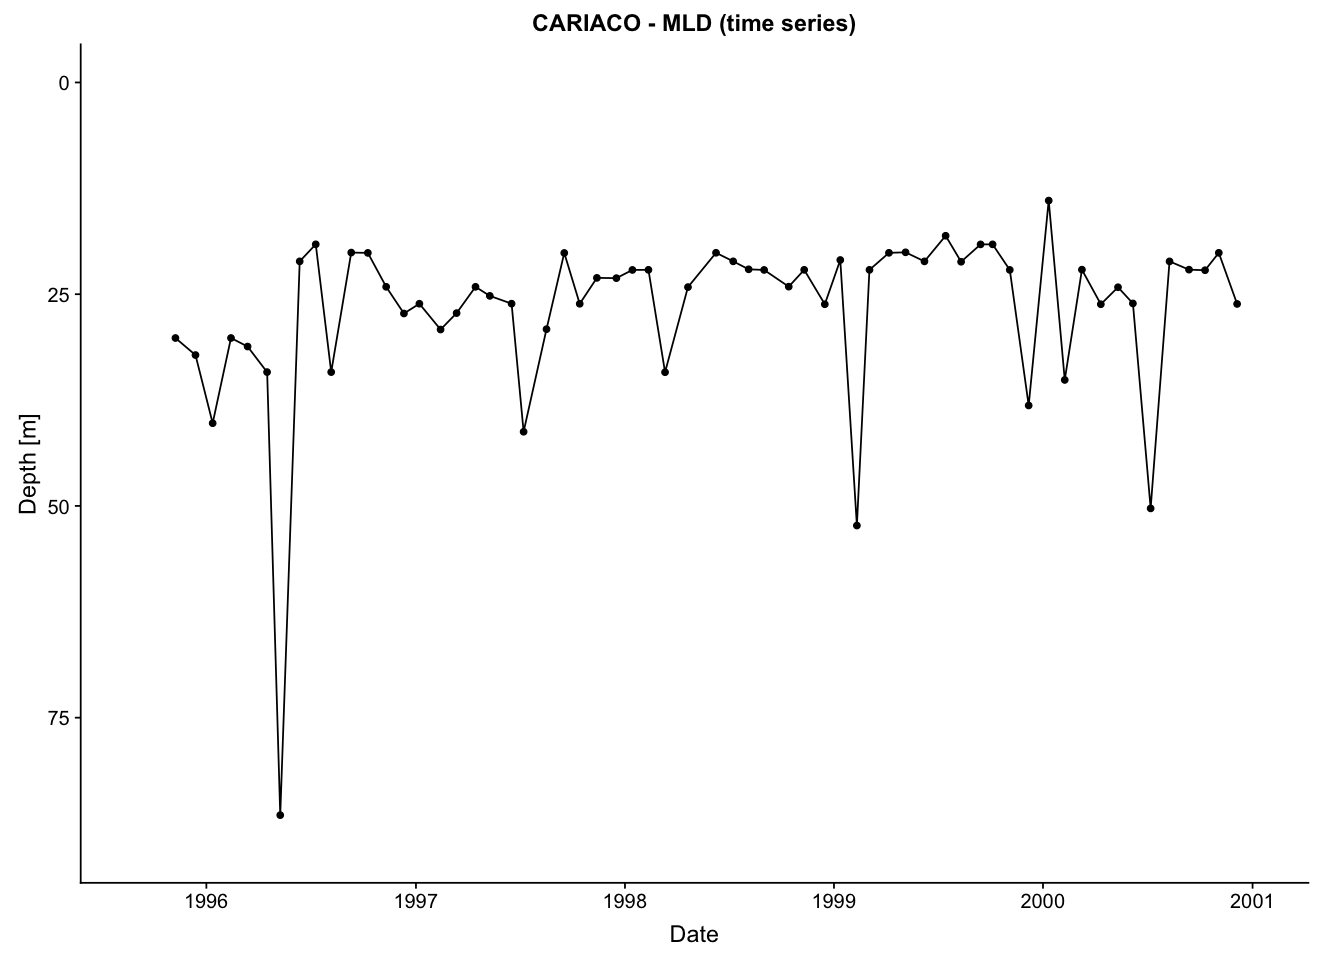

In [85]:
options(repr.plot.width=11, repr.plot.height=8)

ggplot(mld_depth,aes(x=Date,y=press))+
  geom_point()+ geom_line() + scale_y_reverse(lim=c(90,0)) +
  ylab("Depth [m]")+ xlab("Date")+ggtitle("CARIACO - MLD (time series)")+
    scale_x_date(date_breaks = "years", date_labels='%Y',limits= c(as.Date("1995/9/1"), as.Date("2001/1/1")))

ggplot(mld_depth,aes(x=days%%365,y=press))+
  geom_point()+stat_smooth(se=F)+ scale_y_reverse(lim=c(70,0)) +
  ylab("Depth [m]")+ xlab("Day of the year")+ggtitle("CARIACO - MLD (yearly)")

## save calculated MLD depth to csv file

In [30]:
# Write CSV
write.csv(mld_depth, file = "DATA_processed/MLD_depth_calculated.csv")